# Missing Values & Outliers

- # Handling with Missing Values

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'A':[1, 2, np.nan],
                  'B':[5, np.nan, np.nan],
                  'C':[1, 2, 3]})

In [3]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [4]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [5]:
df.dropna(axis = 1)

,C
0,1
1,2
2,3


In [6]:
df.dropna(thresh = 2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [7]:
df.fillna(value = "sut")

,A,B,C
0,1,5,1
1,2,sut,2
2,sut,sut,3


In [8]:
df["A"].fillna(value = df["A"].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [9]:
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,13,5,6,13,7,np.NaN,3,30])
df = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3}        
)

df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [10]:
df.isnull()

,Var1,Var2,Var3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [11]:
df.notnull()

,Var1,Var2,Var3
0,True,True,False
1,True,False,True
2,True,True,True
3,False,True,True
4,True,True,True
5,True,False,True
6,False,False,False
7,True,True,True
8,True,True,True


In [12]:
df.isnull().sum()

Var1    2
Var2    3
Var3    2
dtype: int64

In [13]:
len(df)

9

In [14]:
df.isnull().sum()/len(df)*100

Var1    22.222222
Var2    33.333333
Var3    22.222222
dtype: float64

In [15]:
df.notnull().sum()

Var1    7
Var2    6
Var3    7
dtype: int64

In [16]:
df.isnull().sum().sum()

7

In [17]:
df.Var1.isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: Var1, dtype: bool

In [18]:
df.Var1[df.Var1.isnull()]

3   NaN
6   NaN
Name: Var1, dtype: float64

In [19]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [20]:
df.isnull().any()

Var1    True
Var2    True
Var3    True
dtype: bool

In [21]:
df.isnull().any(axis = 1)

0     True
1     True
2    False
3     True
4    False
5     True
6     True
7    False
8    False
dtype: bool

In [22]:
koşul = df.isnull().any(axis = 1)

In [23]:
df[koşul]

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [24]:
df[~koşul]

,Var1,Var2,Var3
2,5.0,5.0,5.0
4,7.0,11.0,13.0
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [25]:
df[(df.Var1.notnull()) & (df.Var2.notnull()) & (df.Var3.notnull())]

,Var1,Var2,Var3
2,5.0,5.0,5.0
4,7.0,11.0,13.0
7,10.0,2.0,3.0
8,14.0,3.0,30.0


### Missing Values Handling Methods

 - #### Dropping

In [26]:
df.dropna()

,Var1,Var2,Var3
2,5.0,5.0,5.0
4,7.0,11.0,13.0
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [27]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [28]:
df.dropna(how = "all")

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [29]:
df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8


In [30]:
df.dropna(axis = 1, how = "all")

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [31]:
df["delete_me"] = np.nan

In [32]:
df

,Var1,Var2,Var3,delete_me
0,2.0,8.0,NaN,NaN
1,3.0,NaN,13.0,NaN
2,5.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,11.0,13.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,10.0,2.0,3.0,NaN
8,14.0,3.0,30.0,NaN


In [33]:
df.dropna(axis = 1, how = "all", inplace = True)

In [34]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


### 👉[Dropping Missing Values](http://localhost:8888/notebooks/pythonic/DAwPythonSessions/w3resource-pandas-dataframe-dropna.ipynb)

 - #### Filling

In [35]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


 - Filling with a specific value

In [36]:
df["Var1"]

0     2.0
1     3.0
2     5.0
3     NaN
4     7.0
5     1.0
6     NaN
7    10.0
8    14.0
Name: Var1, dtype: float64

In [37]:
df["Var1"].fillna(0)

0     2.0
1     3.0
2     5.0
3     0.0
4     7.0
5     1.0
6     0.0
7    10.0
8    14.0
Name: Var1, dtype: float64

 - Filling with any Proper Value

In [38]:
df["Var1"].mean()

6.0

In [39]:
df["Var1"].fillna(df["Var1"].mean())

0     2.0
1     3.0
2     5.0
3     6.0
4     7.0
5     1.0
6     6.0
7    10.0
8    14.0
Name: Var1, dtype: float64

In [40]:
df.apply(lambda x : x.fillna(x.mean()), axis = 0)

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [41]:
df.mean()[:]

Var1     6.000000
Var2     6.166667
Var3    11.000000
dtype: float64

In [42]:
df.fillna(df.mean()[:])

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [43]:
df.mean()["Var1":"Var2"]

Var1    6.000000
Var2    6.166667
dtype: float64

In [44]:
df.fillna({"Var1" : 6, "Var2": 6.16})

,Var1,Var2,Var3
0,2.0,8.00,NaN
1,3.0,6.16,13.0
2,5.0,5.00,5.0
3,6.0,8.00,6.0
4,7.0,11.00,13.0
5,1.0,6.16,7.0
6,6.0,6.16,NaN
7,10.0,2.00,3.0
8,14.0,3.00,30.0


In [45]:
df.fillna(df.mean()["Var1":"Var2"])

,Var1,Var2,Var3
0,2.0,8.000000,NaN
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [46]:
df["Var3"].fillna(df["Var3"].median())

0     7.0
1    13.0
2     5.0
3     6.0
4    13.0
5     7.0
6     7.0
7     3.0
8    30.0
Name: Var3, dtype: float64

In [47]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [48]:
pd.notna(df)

,Var1,Var2,Var3
0,True,True,False
1,True,False,True
2,True,True,True
3,False,True,True
4,True,True,True
5,True,False,True
6,False,False,False
7,True,True,True
8,True,True,True


In [49]:
df.where(pd.notna(df), df.mean(), axis = 1)

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


 - Filling with any Proper Value Regarding to Group of the Categorical Variables 

In [50]:
Var1 = np.array([1,3,6,np.NaN,7,1,9,np.NaN,15])
Var2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
Var3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
Var4 = np.array(["IT","IT","IT","HR","HR","HR","HR","IT","IT"])

df = pd.DataFrame(
        {"salary" : Var1,
         "Var2" : Var2,
         "Var3" : Var3,
         "department" : Var4}        
)

df

,salary,Var2,Var3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IT
3,NaN,8.0,6.0,HR
4,7.0,12.0,14.0,HR
5,1.0,NaN,7.0,HR
6,9.0,NaN,NaN,HR
7,NaN,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [51]:
df.groupby("department")["salary"].mean()

department
HR    5.666667
IT    6.250000
Name: salary, dtype: float64

In [52]:
df.salary.fillna({0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8, 8:9})

0     1.0
1     3.0
2     6.0
3     4.0
4     7.0
5     1.0
6     9.0
7     8.0
8    15.0
Name: salary, dtype: float64

In [53]:
df.groupby("department")["salary"].transform("mean")

0    6.250000
1    6.250000
2    6.250000
3    5.666667
4    5.666667
5    5.666667
6    5.666667
7    6.250000
8    6.250000
Name: salary, dtype: float64

In [54]:
df["salary"].fillna(df.groupby("department")["salary"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     5.666667
4     7.000000
5     1.000000
6     9.000000
7     6.250000
8    15.000000
Name: salary, dtype: float64

 - Filling the Missing Values of Categorical Values

In [55]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"HR","HR","HR","HR",np.nan,"IT","HR"], dtype=object)

df = pd.DataFrame(
        {"salary" : V1,
        "department" : V4}        
)

df

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,NaN
7,9.0,IT
8,15.0,HR


In [56]:
df["department"].mode()[0]

'HR'

In [57]:
df["department"].fillna(df["department"].mode()[0])

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [58]:
df

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,NaN
7,9.0,IT
8,15.0,HR


In [59]:
df["department"].fillna(method = "bfill")

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    IT
7    IT
8    HR
Name: department, dtype: object

In [60]:
df["department"].fillna(method = "ffill")

0    IT
1    IT
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [61]:
#df.farazi.fillna(a, method = "ffill", limit = 200)
#df.farazi.fillna(b, method = "ffill", limit = 100)
#df.farazi.fillna(a, method = "ffill", limit = 100)
#df.farazi.fillna(c, method = "ffill", limit = 100)
#df.farazi.fillna(a, method = "ffill", limit = 100)
#df.farazi.fillna(b, method = "ffill", limit = 200)
#df.farazi.fillna(c, method = "ffill", limit = 100)
#df.farazi.fillna(a, method = "ffill", limit = 100)

### 👉[`.fillna()`](http://localhost:8888/notebooks/pythonic/DAwPythonSessions/w3resource-pandas-dataframe-fillna.ipynb)

 - # Handling with Outliers

## Catching and Detecting Outliers

In [62]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


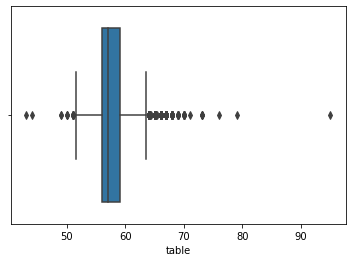

In [63]:
sns.boxplot(x = df.table)

In [64]:
df_table = df["table"]

In [65]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [66]:
pd.DataFrame(df_table).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   table   53940 non-null  float64
dtypes: float64(1)
memory usage: 842.8 KB


In [67]:
len(df_table)

53940

## Tukey's Fences | Tukey's Rule

- First way of specifying ``Q1 & Q3`` is using the ``.quantile()`` method

In [68]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

In [69]:
Q1

56.0

In [70]:
Q3

59.0

In [71]:
IQR

3.0

- Second way of specifying ``Q1 & Q3`` is using the ``.describe()`` method

In [72]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [73]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [74]:
lower_lim

51.5

In [75]:
upper_lim

63.5

In [76]:
(df_table < lower_lim)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [77]:
(df_table > upper_lim)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [78]:
outliers_15_low = (df_table < lower_lim)

In [79]:
outliers_15_up = (df_table > upper_lim)

In [80]:
df_table[outliers_15_low]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [81]:
len(df_table[outliers_15_low])

16

In [82]:
df_table[outliers_15_up]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [83]:
len(df_table) - (len(df_table[outliers_15_low]) + len(df_table[outliers_15_up]))

53335

In [84]:
df_table[(outliers_15_low | outliers_15_up)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

***

In [85]:
lower_lim = Q1 - 2.5 * IQR
upper_lim = Q3 + 2.5 * IQR

In [86]:
lower_lim

48.5

In [87]:
upper_lim

66.5

In [88]:
(df_table < lower_lim) | (df_table > upper_lim)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [89]:
outliers_25 = (df_table < lower_lim) | (df_table > upper_lim)

In [90]:
df_table[outliers_25]

91       69.0
227      67.0
314      70.0
359      68.0
526      67.0
         ... 
52860    73.0
52861    73.0
53064    68.0
53542    67.0
53660    67.0
Name: table, Length: 91, dtype: float64

### Removing the Outliers

In [91]:
df_table[~(outliers_15_low | outliers_15_up)]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [92]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

not_outliers_15 = (df_table >= lower_lim) & (df_table <= upper_lim)

In [93]:
df_table[not_outliers_15]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [94]:
clean_df = df[not_outliers_15]

In [95]:
clean_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Limitation and Transformation of the Outliers

- ### Limitation using ``.winsorize()`` method

In [96]:
from scipy.stats.mstats import winsorize

In [97]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [98]:
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

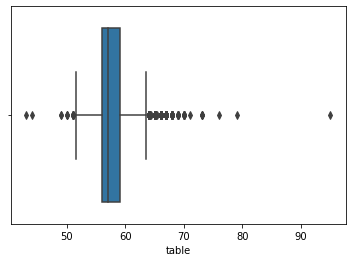

In [99]:
sns.boxplot(x = df_table)

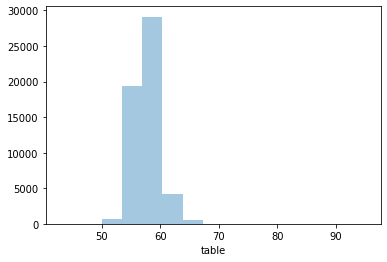

In [100]:
sns.distplot(df_table, bins = 15, kde = False)

In [101]:
df_table_win = winsorize(df_table, (0.01, 0.02))

In [102]:
df_table_win

masked_array(data=[55., 61., 63., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

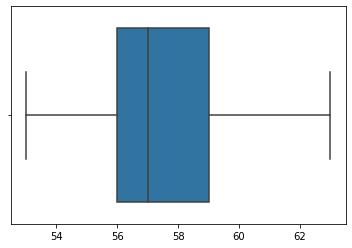

In [103]:
sns.boxplot(x = df_table_win)

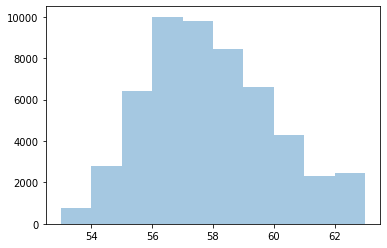

In [104]:
sns.distplot(df_table_win, bins = 10, kde =False)

In [105]:
pd.DataFrame(df_table_win)

,0
0,55.0
1,61.0
2,63.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [106]:
pd.DataFrame(df_table_win)[0]

0        55.0
1        61.0
2        63.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: 0, Length: 53940, dtype: float64

In [107]:
df_table_win = pd.DataFrame(df_table_win)[0]

- **trimmed_by** =  ``n`` x (1 - ``sum(limit)``)

- ``Q1`` - **trimmed by** = new ``min`` value
- ``Q3`` + **trimmed by** = new ``max`` value

In [108]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [117]:
df_table_win.describe()

count    53940.000000
mean        57.434607
std          2.142774
min         53.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.000000
Name: 0, dtype: float64

In [109]:
df_table.sort_values().head(20)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [110]:
df_table_win.sort_values().head(55)

35246    53.0
42958    53.0
34901    53.0
5207     53.0
31688    53.0
31689    53.0
7838     53.0
42921    53.0
34826    53.0
31807    53.0
17608    53.0
31647    53.0
17651    53.0
17658    53.0
26613    53.0
17711    53.0
26585    53.0
46276    53.0
2275     53.0
17736    53.0
31863    53.0
6474     53.0
26524    53.0
26619    53.0
4268     53.0
17289    53.0
34922    53.0
630      53.0
31500    53.0
35153    53.0
16916    53.0
43018    53.0
50366    53.0
6412     53.0
43016    53.0
50332    53.0
35117    53.0
35113    53.0
16959    53.0
43015    53.0
2913     53.0
31609    53.0
17053    53.0
17164    53.0
50279    53.0
35055    53.0
35040    53.0
50210    53.0
26832    53.0
1515     53.0
46316    53.0
27086    53.0
26455    53.0
42836    53.0
18357    53.0
Name: 0, dtype: float64

In [111]:
df_table_win[11368]

53.0

In [112]:
df_table_win[24815]

53.0

In [113]:
df_table_win[5144]

53.0

In [114]:
df_table_win[df_table_win == 53]

115      53.0
243      53.0
593      53.0
612      53.0
630      53.0
         ... 
53657    53.0
53688    53.0
53706    53.0
53771    53.0
53881    53.0
Name: 0, Length: 643, dtype: float64

In [115]:
df_table[df_table == 53]

115      53.0
593      53.0
612      53.0
630      53.0
734      53.0
         ... 
53578    53.0
53657    53.0
53706    53.0
53771    53.0
53881    53.0
Name: table, Length: 567, dtype: float64

In [116]:
df_table_win[df_table_win == 63]

2        63.0
43       63.0
91       63.0
122      63.0
145      63.0
         ... 
53785    63.0
53825    63.0
53828    63.0
53840    63.0
53897    63.0
Name: 0, Length: 1180, dtype: float64

In [117]:
df_table[df_table == 63]

43       63.0
122      63.0
200      63.0
218      63.0
443      63.0
         ... 
53758    63.0
53825    63.0
53828    63.0
53840    63.0
53897    63.0
Name: table, Length: 588, dtype: float64

In [ ]:
Q1 = 56.0
Q3 = 59.0

In [118]:
IQR = Q3 - Q1

In [119]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [120]:
lower

51.5

In [121]:
upper

63.5

In [122]:
outliers_15 = (df_table_win < lower) | (df_table_win > upper)

In [123]:
df_table[outliers_15]

Series([], Name: table, dtype: float64)

In [141]:
df["table_win"] = df_table_win

In [142]:
df.head()

,carat,depth,table,price,x,y,z,carat_log,table_win
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676,55.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648,61.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676,63.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874,58.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183,58.0


- ### ``log()`` Transformation

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [128]:
df_carat = df["carat"]

In [129]:
df_carat.shape

(53940,)

In [130]:
df_carat.head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

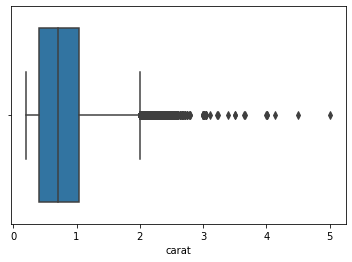

In [131]:
sns.boxplot(x = df_carat)

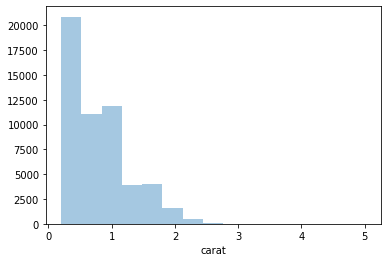

In [132]:
sns.distplot(df_carat, bins = 15, kde = False)

In [133]:
df_carat_log = np.log(df_carat)

In [134]:
df_carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

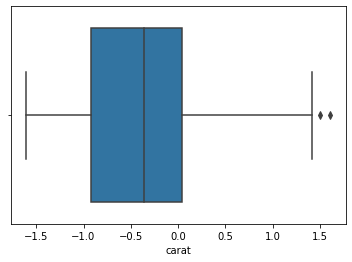

In [135]:
sns.boxplot(x = df_carat_log)

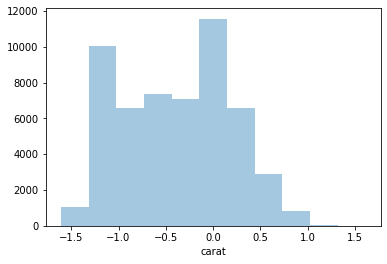

In [136]:
sns.distplot(df_carat_log,  bins = 11, kde = False)

In [137]:
df["carat_log"] = np.log(df["carat"])

In [143]:
df.head()

,carat,depth,table,price,x,y,z,carat_log,table_win
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676,55.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648,61.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676,63.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874,58.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183,58.0


In [144]:
Q1 = df_carat.quantile(0.25)
Q3 = df_carat.quantile(0.75)
IQR = Q3-Q1

In [145]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [146]:
lower_lim

-0.5599999999999999

In [147]:
upper_lim

2.0

In [148]:
(df_carat < lower_lim) | (df_carat > upper_lim)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: carat, Length: 53940, dtype: bool

In [149]:
outliers_15 = (df_carat < lower_lim) | (df_carat > upper_lim)

In [150]:
df_carat[outliers_15]

12246    2.06
13002    2.14
13118    2.15
13757    2.22
13991    2.01
         ... 
27741    2.15
27742    2.04
27744    2.29
27746    2.07
27749    2.29
Name: carat, Length: 1889, dtype: float64

In [151]:
df_carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

In [152]:
Q1_log = df_carat_log.quantile(0.25)
Q3_log = df_carat_log.quantile(0.75)
IQR_log = Q3_log-Q1_log

In [153]:
lower_lim_log = Q1_log - 1.5 * IQR_log
upper_lim_log = Q3_log + 1.5 * IQR_log

In [154]:
(df_carat_log < lower_lim_log) | (df_carat_log > upper_lim_log)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: carat, Length: 53940, dtype: bool

In [155]:
outliers_15_log = (df_carat_log < lower_lim_log) | (df_carat_log > upper_lim_log)

In [156]:
df_carat[outliers_15_log]

27415    5.01
27630    4.50
Name: carat, dtype: float64